# Metodología y Desarrollo

## Metodología

Para este proyecto se utiliza una base de datos en formato csv de libros reseñados por más de 2 millones de usuarios en la plataforma Goodreads hasta el 2023. Esta base de datos contiene las siguientes variables: 

- **´BookID'**: La identificación del libro de acuerdo con su nivel en la plataforma de Goodreads. 
- **´Title´**: título del libro. 
- **´Authors´**: autor/es del libro. 
- **´Average_rating´**: el puntaje acumulado de la calificación en la plataforma. 
- **´Isbn´**: identificador único de 10 dígitos. 
- **´Isbn13´**: identificador único de 13 dígitos. 
- **´Language_code´**: idioma en el que está escrito originalmente. 
- **´Num_pages´**: número de páginas. 
- **´Ratings_count´**: cantidad de usuarios que han calificado el libro. 
- **´Text_reviews´**: cantidad de reseñas escritas que ha recibido el libro. 
- **´Publication_date´**: fecha de publicación. 
- **´Publisher´**: casa editorial que publica el libro. 

Para llevar a cabo la predicción de las calificaciones de libros en la plataforma Goodreads, se implementó el modelo Stacking. Se utilizó este modelo mejorado de machine learning ya que es una técnica que permite mayor reducción del sesgo y de la varianza en las predicciones y, por ende, permite mejorar el rendimiento de la misma. Para demostrarlo, se realizaron otros modelos de regresión como AdaBoost, Ridge, Random Forest y SVM que fueron comparados entre sí con su RMSE y su R^2.  

En primer lugar, el proyecto se considera de tipo cuantitativo al ser un estudio que funciona para hacer estimaciones de las futuras calificaciones de nuevos libros en el mercado. Inicialmente se realizó un análisis exploratorio de los datos para comprenderlos, determinar patrones, identificar valores atípicos, visualizar los datos y prepararlos para la formulación de modelos. Para la limpieza de los datos, se calculó la correlación de las variables.

En segundo lugar, se formularon los modelos de regresión tradicionales y por último se realizó el modelo Stacking. Este último se basa en el ensamblaje de modelos de aprendizaje automático para lograr mejores predicciones, más robustas y con menos sesgos. Para su evaluación se utilizaron metricas como ´RMSE´, que al ser cercano a 0, el modelo demuestra un ajuste perfecto y el ´R^2´, que al ser cercano a 1, el modelo indica una mayor precisión. 

<div style="text-align:center;">
  <img src="C:/Users/Linda Herrera/ProyectoML/docs/Imagenes/Stacking.png" alt="Texto alternativo" width="300px" height="200px">
</div>

## Desarrollo

### EDA

In [2]:
# Librerias EDA

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

#### Cargar los datos

Los datos serán obtenidos de un archivo CSV que contienen el listado de más de 11.000 libros y sus características. Es posible encontrar el dataset en Kaggle en [este enlace: Goodreads Book Datasets With User Rating 2M](https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m).


In [3]:
# Extraer los datos del archivo .csv
archivo_csv = 'C:/ProgramasML/ML/Ejemplosclase/Proyecto/Archivos/books.csv'

# Crear un DataFrame para almacenar los datos combinados
databooks = pd.read_csv(archivo_csv)

In [4]:
# Overview de los datos
print('Cantidad de datos: ', databooks.shape)
print('Listado de columnas y 5 primeras filas: ', databooks.columns)
databooks.head()

Cantidad de datos:  (11127, 12)
Listado de columnas y 5 primeras filas:  Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher;;;'],
      dtype='object')


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.;;;
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.;;;
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333.0,244.0,11/1/2003,Scholastic;;;
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435.0,2339585.0,36325.0,5/1/2004,Scholastic Inc.;;;
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690.0,41428.0,164.0,9/13/2004,Scholastic;;;


#### Exploración y limpieza de datos

In [5]:
# Revisar columnas, cantidad de datos y tipo
databooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11098 non-null  object 
 2   authors             11098 non-null  object 
 3   average_rating      11098 non-null  float64
 4   isbn                11098 non-null  object 
 5   isbn13              11098 non-null  float64
 6   language_code       11098 non-null  object 
 7     num_pages         11098 non-null  float64
 8   ratings_count       11098 non-null  float64
 9   text_reviews_count  11098 non-null  float64
 10  publication_date    11098 non-null  object 
 11  publisher;;;        11098 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.0+ MB


- Verificar duplicados y eliminarlos

In [6]:
# Verificar si existen duplicados en el DataFrame
databooks[databooks.duplicated()]

# Eliminar los datos duplicados
databooks = databooks.drop_duplicates()

- Comprobar si hay datos faltantes

In [7]:
datos_books_NA = databooks.isna().sum()
pd.concat([datos_books_NA], axis=1, sort = False, keys = ['datos_books NA'])

,datos_books NA
bookID,0
title,29
authors,29
average_rating,29
isbn,29
isbn13,29
language_code,29
num_pages,29
ratings_count,29
text_reviews_count,29


En total faltan 29 datos, estas filas serán eliminadas.

In [8]:
databooks = databooks.dropna(subset=['title'])
print('Cantidad de datos posterior a la eliminación de las filas en blanco: ', databooks.shape)

Cantidad de datos posterior a la eliminación de las filas en blanco:  (11098, 12)


- Revisión y corrección de algunas columnas

Convertir la columna 'bookID' en tipo entero.

In [9]:
databooks['bookID'] = databooks['bookID'].astype(int)

Convertir la columna 'publication_date' en una columna tipo fecha con un formato mm/dd/aaaa

In [10]:
databooks['publication_date'] = pd.to_datetime(databooks['publication_date'], format='%m/%d/%Y', errors='coerce')

Agregar columna con solo el año

In [11]:
databooks['year'] = pd.DatetimeIndex(databooks['publication_date']).year

Renombrar las columnas 'num_pages' y 'publisher;;;'

In [12]:
databooks.rename(columns = {'  num_pages': 'num_pages'}, inplace=True)
databooks.rename(columns = {'publisher;;;': 'publisher'}, inplace=True)

- Descripción general de los datos

In [13]:
databooks.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,year
count,11098.000000,11098.000000,1.109800e+04,11098.000000,1.109800e+04,11098.00000,11098,11098.000000
mean,21317.591278,3.934580,9.759833e+12,336.514777,1.798103e+04,543.10975,2000-08-30 07:43:44.256622848,2000.174085
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.00000,1900-01-01 00:00:00,1900.000000
25%,10304.250000,3.770000,9.780345e+12,192.000000,1.042500e+02,9.00000,1998-08-01 00:00:00,1998.000000
50%,20301.000000,3.960000,9.780584e+12,299.000000,7.480000e+02,47.00000,2003-03-01 00:00:00,2003.000000
75%,32106.750000,4.140000,9.780872e+12,416.000000,5.016750e+03,238.00000,2005-10-01 00:00:00,2005.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.00000,2020-03-31 00:00:00,2020.000000
std,13092.700518,0.348448,4.434734e+11,241.288321,1.126229e+05,2579.41135,NaN,8.250339


- Tratamiento de datos de la columna 'language_code'

Contar los datos únicos de la columna tipo object llamada 'language_code'

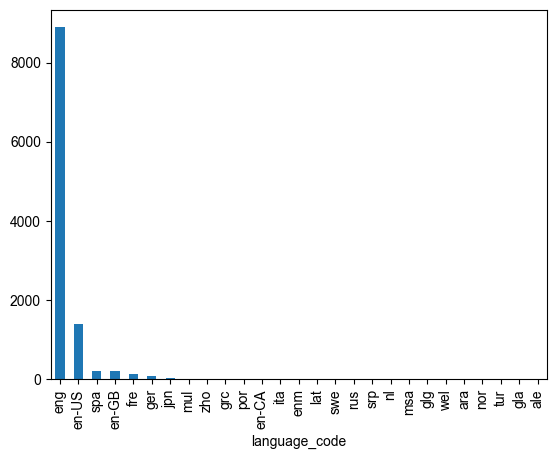

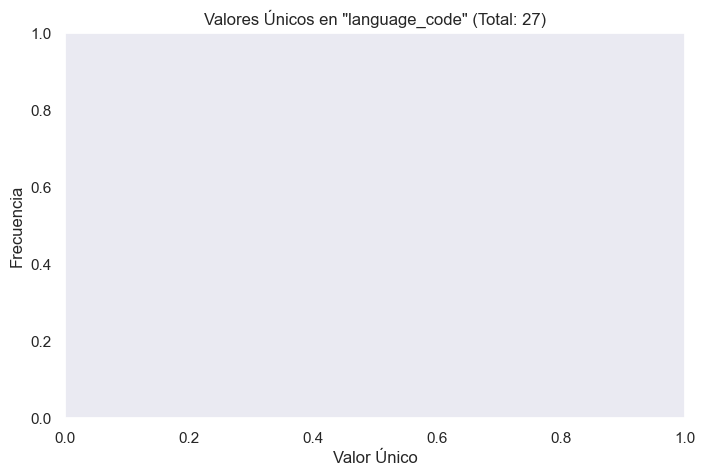

In [14]:
# Obtener la cuenta de valores únicos en la columna
conteo_valores_unicos = databooks['language_code'].nunique()

# Usamos value_counts() para contar la frecuencia de cada valor único y luego generamos un gráfico de barras
databooks['language_code'].value_counts().plot(kind='bar')

# Configura las etiquetas y el título
sns.set(style="dark") 
sns.set_palette("viridis") 
plt.figure(figsize=(8, 5))
plt.xlabel('Valor Único')
plt.ylabel('Frecuencia')
plt.title(f'Valores Únicos en "language_code" (Total: {conteo_valores_unicos})')

# Mostrar el gráfico
plt.show()

Unificar en un solo código todos los que sean lenguaje Ingles, dado que en los datos existen 6 diferentes. 

In [15]:
encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}}
databooks.replace(encoding, inplace=True)

Aplicar OrdinalEncoder a la columna 'language_code' para convertirla en una columna numérica, es decir, el código de cada lengua ahora corresponderá a un número entero. 

In [16]:
enc = OrdinalEncoder()
enc.fit(databooks[['language_code']])
databooks[['language_code']] = enc.fit_transform(databooks[['language_code']])

Agregar nueva columna que contendrá el número de ocurrencias de titulo.

In [17]:
databooks['num_occ_title'] = databooks.groupby('title')['title'].transform('count')

Calcular algunos ratios

In [18]:
databooks['rate_occ_title'] = databooks['average_rating'] *databooks['num_occ_title']
databooks['rate_weight'] = databooks['average_rating'] * databooks['text_reviews_count']
databooks['rate_weight_2'] = databooks['average_rating'] * databooks['ratings_count']
databooks['rate_per_pages'] = databooks['average_rating'] * databooks['num_pages']

In [19]:
databooks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11098 entries, 0 to 11126
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11098 non-null  int32         
 1   title               11098 non-null  object        
 2   authors             11098 non-null  object        
 3   average_rating      11098 non-null  float64       
 4   isbn                11098 non-null  object        
 5   isbn13              11098 non-null  float64       
 6   language_code       11098 non-null  float64       
 7   num_pages           11098 non-null  float64       
 8   ratings_count       11098 non-null  float64       
 9   text_reviews_count  11098 non-null  float64       
 10  publication_date    11098 non-null  datetime64[ns]
 11  publisher           11098 non-null  object        
 12  year                11098 non-null  int32         
 13  num_occ_title       11098 non-null  int64         


Por otro lado, también eliminaremos las columnas 'bookID', 'isbn' y 'isbn13' estos son identificadores únicos para libros ([ISBN](https://es.wikipedia.org/wiki/ISBN)), que se le asignan cuando el libro es publicado para identificarlo internacionalmente, por ende, ya que nuestro objetivo es predecir si un libro será exitoso antes de ser publicado, no podemos tener como requisito unas variables que se le asignarán posterior a su publicación. 

In [20]:
databooks = databooks.drop(['bookID'],axis=1)
databooks = databooks.drop(['isbn'],axis=1)
databooks = databooks.drop(['isbn13'],axis=1)

Eliminar las columnas authors, publisher y title debido a que son características diferentes para cada libro y no sumarán mucho en nuestro análisis.

In [21]:
databooks = databooks.drop(['title'],axis=1)
databooks = databooks.drop(['authors'],axis=1)
databooks = databooks.drop(['publisher'],axis=1)

- Verificar correlación

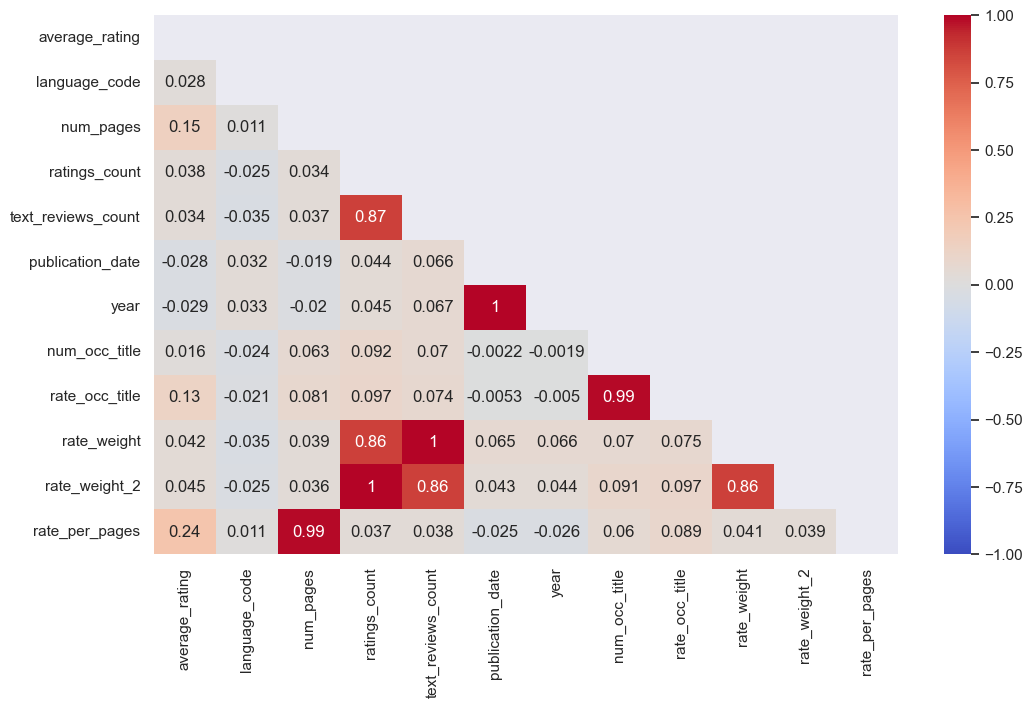

In [22]:
# Grafico de correlación entre características. 
sns.set(font_scale=1.1)
sns.set(style="dark") 
sns.set_palette("viridis") 
data_to_plot = databooks
corr_matrix = data_to_plot.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm", mask=mask)
plt.show()

Del mapa de calor:

Es entendible la correlación entre los ratios y los conteos de variables como text_review, num_pages, entre otras. Igualmente es natural que 'publication_date' y 'year' estén relacionadas, en este caso, eliminaremos la columna 'publication_date' y nos quedaremos con la columna 'year'.

In [23]:
databooks = databooks.drop(['publication_date' ],axis=1)

- Descripción de los datos posterior a la limpieza de datos.

In [24]:
databooks.describe()

,average_rating,language_code,num_pages,ratings_count,text_reviews_count,year,num_occ_title,rate_occ_title,rate_weight,rate_weight_2,rate_per_pages
count,11098.000000,11098.000000,11098.000000,1.109800e+04,11098.00000,11098.000000,11098.000000,11098.000000,11098.000000,1.109800e+04,11098.000000
mean,3.934580,2.484592,336.514777,1.798103e+04,543.10975,2000.174085,1.241845,4.891006,2167.099640,7.224893e+04,1336.832801
std,0.348448,2.539050,241.288321,1.126229e+05,2579.41135,8.250339,0.875965,3.503451,10400.763114,4.537598e+05,1027.557764
min,0.000000,0.000000,0.000000,0.000000e+00,0.00000,1900.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,2.000000,192.000000,1.042500e+02,9.00000,1998.000000,1.000000,3.800000,35.280000,4.096725e+02,768.045000
50%,3.960000,2.000000,299.000000,7.480000e+02,47.00000,2003.000000,1.000000,4.000000,183.850000,2.942845e+03,1154.720000
75%,4.140000,2.000000,416.000000,5.016750e+03,238.00000,2005.000000,1.000000,4.230000,929.602500,1.976390e+04,1648.560000
max,5.000000,23.000000,6576.000000,4.597666e+06,94265.00000,2020.000000,9.000000,38.880000,379669.970000,1.650562e+07,30907.200000


#### Visualización de datos

Para la visualización y análisis univariado y bivariado separaremos los datos en data (contendrá las características) y targue (variable de interés).

In [25]:
# Separar los datos entre data y target
data = databooks.drop(['average_rating'], axis=1)
target = databooks['average_rating']

- Variable de interés

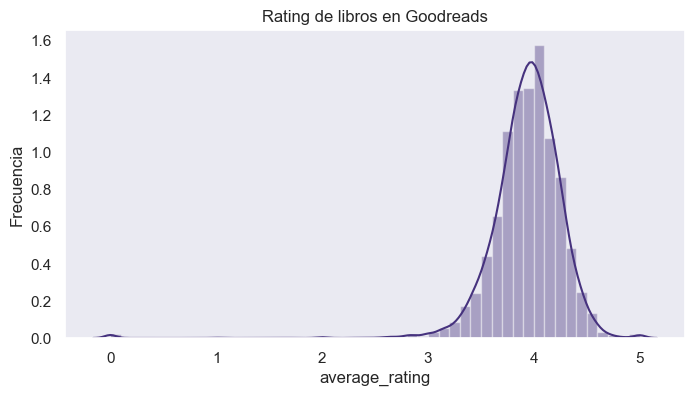

In [26]:
# Graficar el histograma de nuestra variable de interes 'average_rating'
sns.set(font_scale=1.5)
sns.set(style="dark") 
sns.set_palette("viridis") 
plt.figure(figsize=(8, 4))
plt.title('Rating de libros en Goodreads')
sns.distplot(databooks["average_rating"], axlabel="average_rating");
plt.ylabel('Frecuencia')
plt.show()

- Analísis univariado

Graficar histograma y boxplot de cada una de las variables.

Column:  language_code
Skew: 5.77
Kurtosis:  32.86


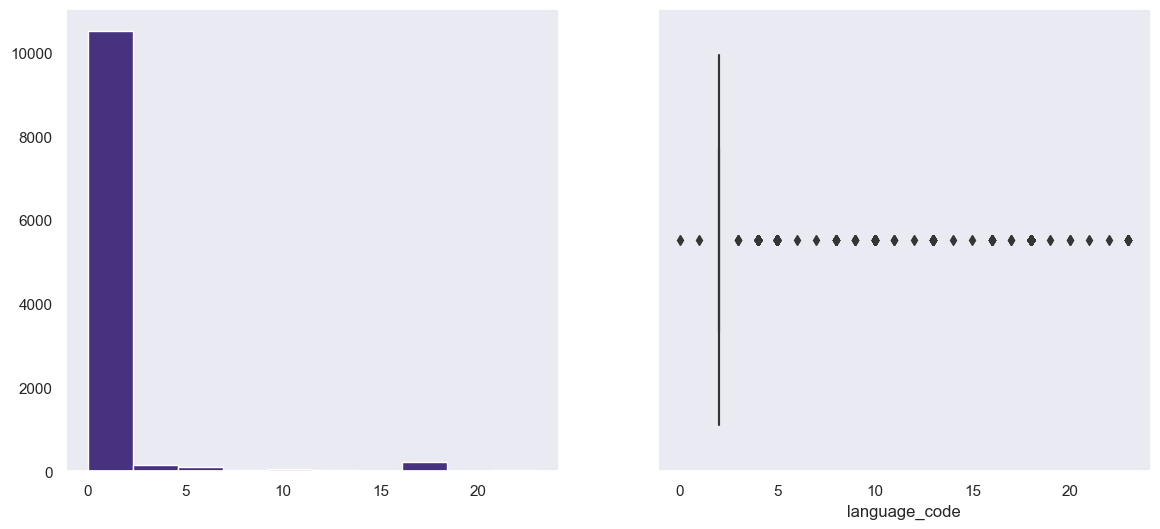

Column:  num_pages
Skew: 4.27
Kurtosis:  62.41


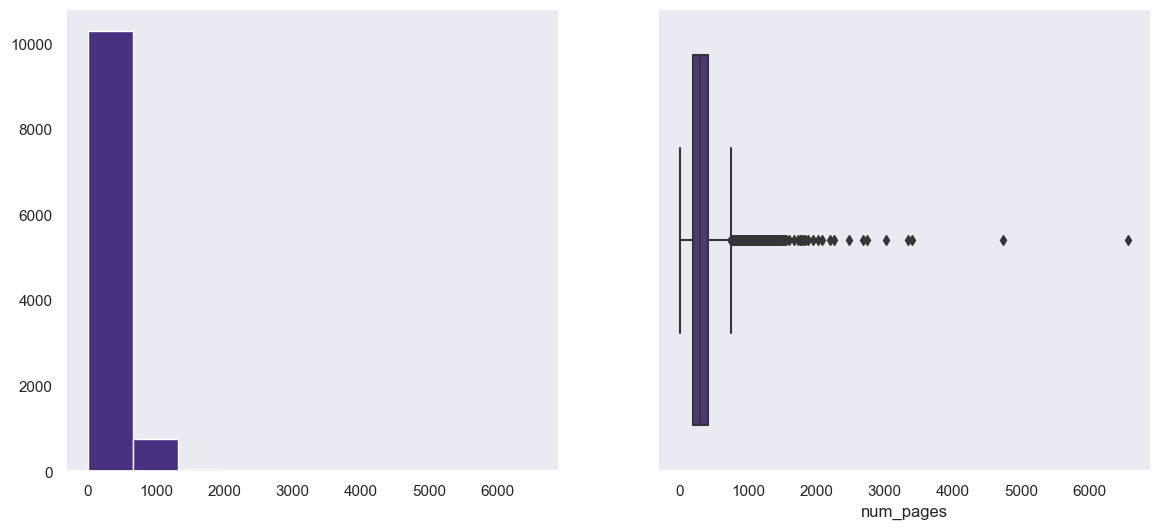

Column:  ratings_count
Skew: 17.67
Kurtosis:  441.29


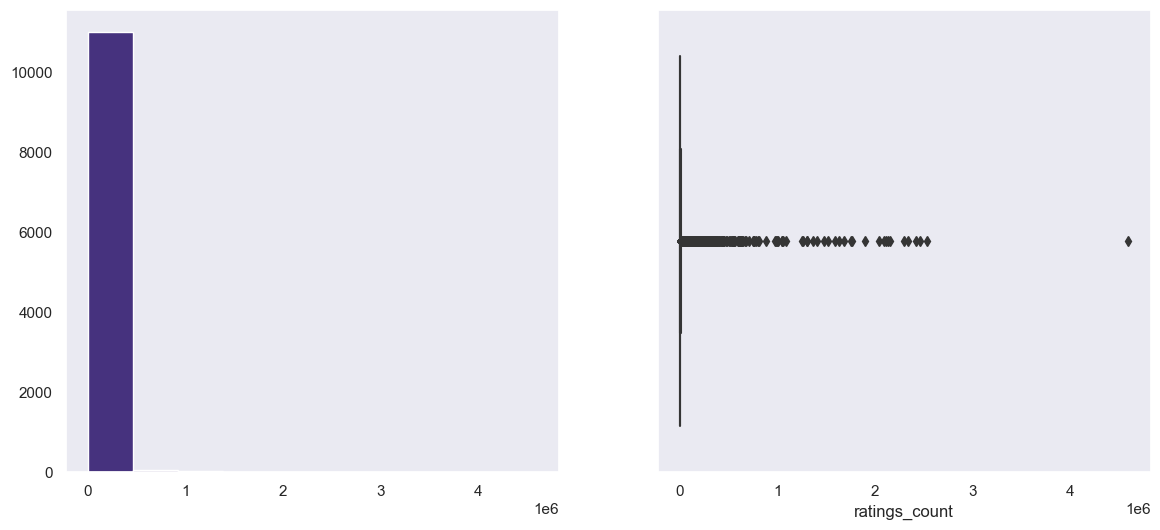

Column:  text_reviews_count
Skew: 16.16
Kurtosis:  395.71


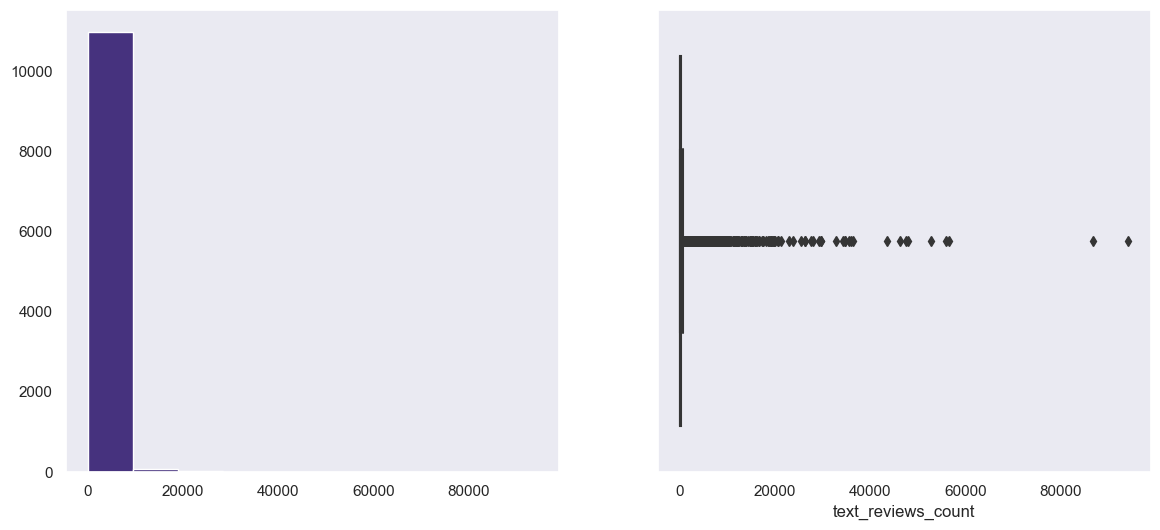

Column:  year
Skew: -3.0
Kurtosis:  16.28


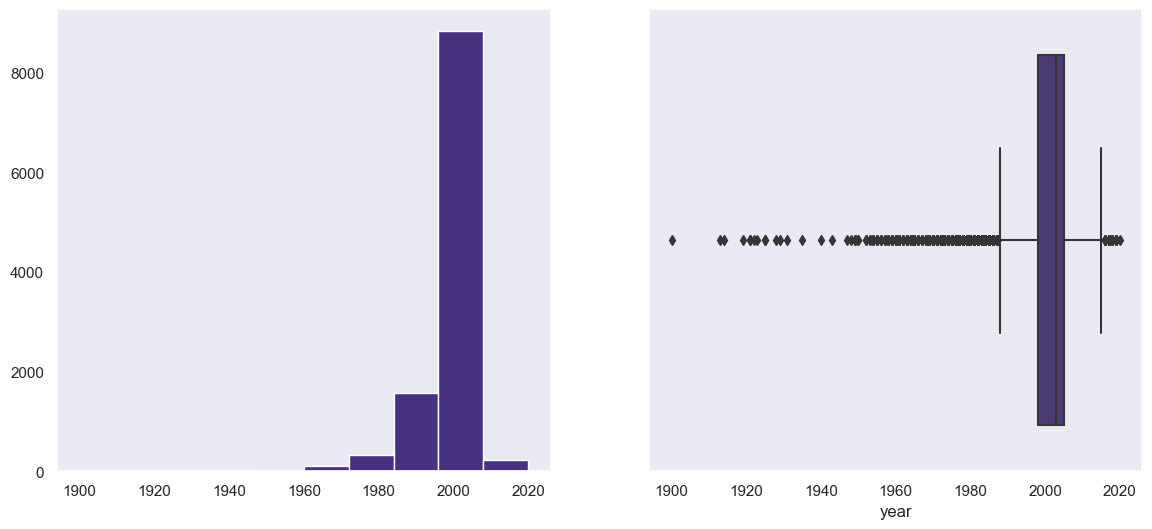

Column:  num_occ_title
Skew: 5.01
Kurtosis:  29.26


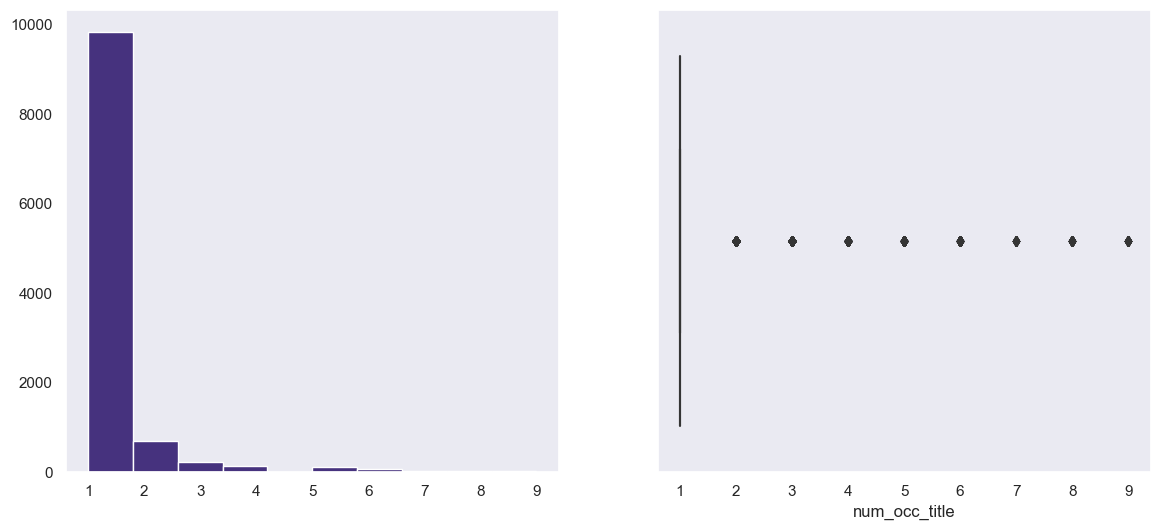

Column:  rate_occ_title
Skew: 4.98
Kurtosis:  29.55


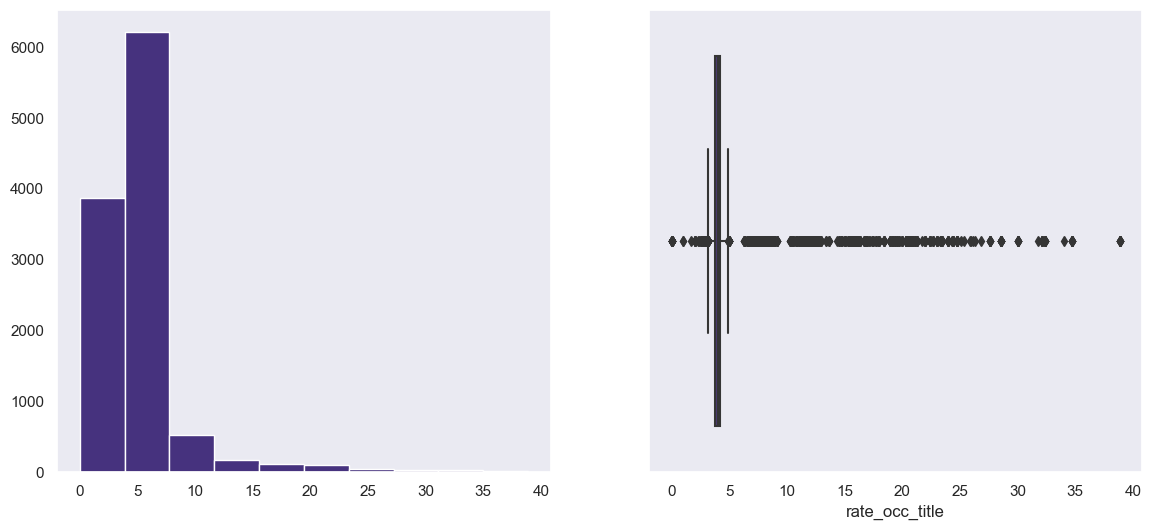

Column:  rate_weight
Skew: 16.0
Kurtosis:  384.07


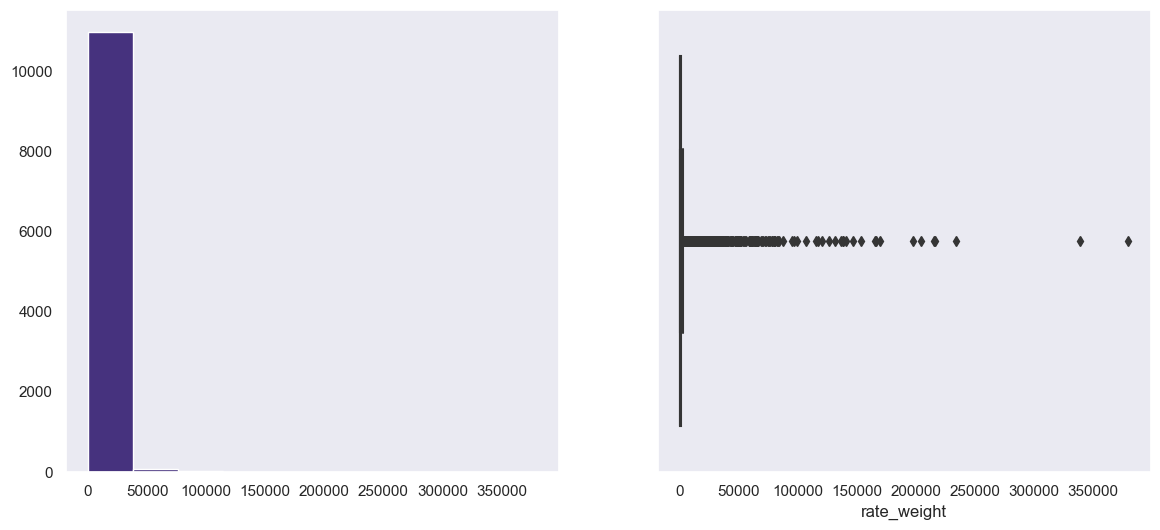

Column:  rate_weight_2
Skew: 16.9
Kurtosis:  379.05


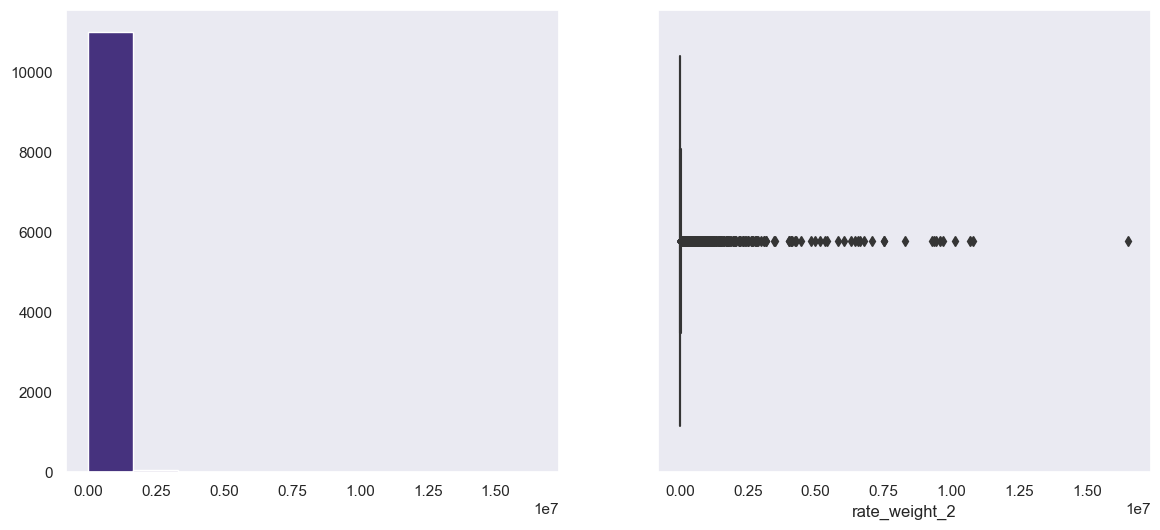

Column:  rate_per_pages
Skew: 5.24
Kurtosis:  89.52


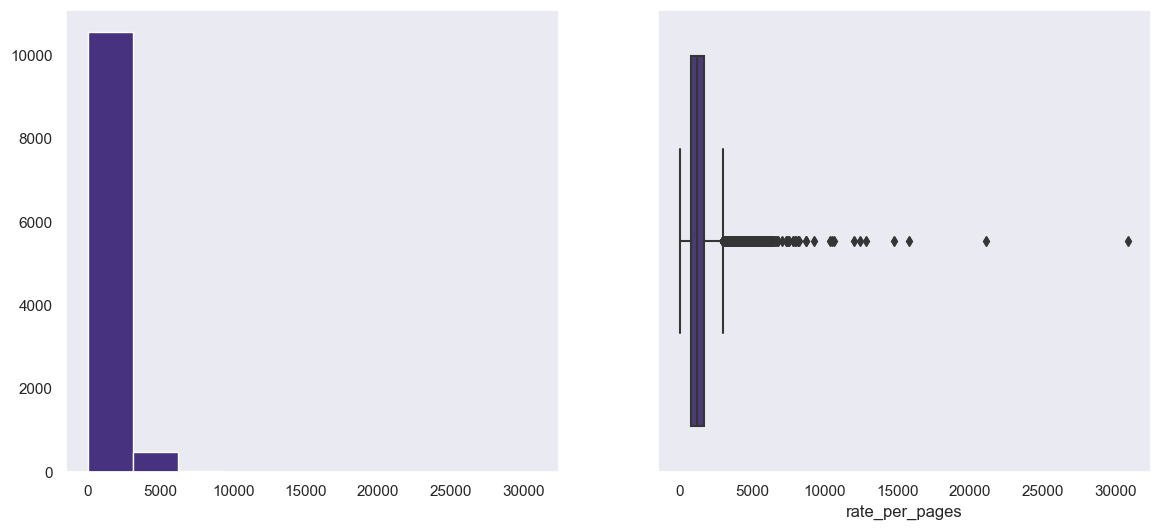

In [27]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    sns.set(font_scale=1.4)
    sns.set(style="dark") 
    sns.set_palette("viridis") 
    print('Column: ', col)
    print('Skew:', round(data[col].skew(), 2))
    print('Kurtosis: ', round(data[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

- Análisis bivariado

Crear graficas para análisis bivariado, en el que veremos todas nuestras columnas vs el promedio de calificación de cada libro 'average_raiting'

In [28]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    sns.set(style="dark") 
    sns.set_palette("viridis")     
    fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y average_rating'%col)

In [29]:
for col in num_cols:
    scatter_regplot(databooks, col, 'average_rating')

### Modelos de regresión tradicionales

In [ ]:
# Librerias para Modelos

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

from sklearn.ensemble import AdaBoostRegressor

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge

from sklearn.svm import SVR

from sklearn.ensemble import StackingRegressor

#### División de los datos

In [ ]:
# Renombrar nuestra división de los datos para facilidad durante la creación y evaluación de los modelos
X = data
y = target

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)

## Modelo AdaBoost

In [ ]:

# Crear un pipeline con preprocesamiento, escalado y regresor AdaBoost
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalar las características
    ('adaboost', AdaBoostRegressor())  # Regresor AdaBoost
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'adaboost__n_estimators': [50, 100, 200],  # Número de estimadores (árboles débiles)
    'adaboost__learning_rate': [0.01, 0.1, 1]  # Tasa de aprendizaje
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
mse_ada = mean_squared_error(y_test, y_pred)
r2_ada = r2_score(y_test, y_pred)

# Imprimir las métricas en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
print(f"Error cuadrático medio (MSE): {mse_ada:.2f}")
print(f"R-cuadrado (R2): {r2_ada:.2f}")

# Calcular y mostrar los scores de entrenamiento
print("\nScores de entrenamiento:")
train_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
train_scores_ada = list(train_scores)
for i, score in enumerate(train_scores, 1):
    print(f"Fold {i}: {score:.2f}")
print(f"Puntuación media de entrenamiento: {train_scores.mean():.2f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Métricas en el conjunto de prueba:
Error cuadrático medio (MSE): 0.01
R-cuadrado (R2): 0.90

Scores de entrenamiento:
Fold 1: 0.88
Fold 2: 0.87
Fold 3: 0.89
Fold 4: 0.88
Fold 5: 0.89
Puntuación media de entrenamiento: 0.88


## Modelo Ridge

In [ ]:

# Crear un pipeline con preprocesamiento, escalado y regresor Ridge
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Escalar las características
    ('ridge', Ridge())  # Regresor Ridge
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0],  # Parámetro de regularización alpha
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

# Imprimir las métricas en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
print(f"Error cuadrático medio (MSE): {mse_ridge:.2f}")
print(f"R-cuadrado (R2): {r2_ridge:.2f}")

# Calcular y mostrar los scores de entrenamiento
print("\nScores de entrenamiento:")
train_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
train_scores_ridge = list(train_scores)
for i, score in enumerate(train_scores, 1):
    print(f"Fold {i}: {score:.2f}")
print(f"Puntuación media de entrenamiento: {train_scores.mean():.2f}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Métricas en el conjunto de prueba:
Error cuadrático medio (MSE): 0.03
R-cuadrado (R2): 0.79

Scores de entrenamiento:
Fold 1: 0.74
Fold 2: 0.78
Fold 3: 0.78
Fold 4: 0.74
Fold 5: 0.79
Puntuación media de entrenamiento: 0.77


## Modelo Random Forest

In [ ]:

# Crear un pipeline con preprocesamiento, escalado y regresor Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('random_forest', RandomForestRegressor())  # Regresor Random Forest
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'random_forest__max_depth': [3, 5, 7],  # Profundidad máxima de los árboles
    'random_forest__min_samples_split': [2, 5, 10, 15]  # Número mínimo de muestras requeridas para dividir un nodo
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Imprimir las métricas en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
print(f"Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"R-cuadrado (R2): {r2_rf:.2f}")

# Calcular y mostrar los scores de entrenamiento
print("\nScores de entrenamiento:")
train_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
train_scores_rf = list(train_scores)
for i, score in enumerate(train_scores, 1):
    print(f"Fold {i}: {score:.2f}")
print(f"Puntuación media de entrenamiento: {train_scores.mean():.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Métricas en el conjunto de prueba:
Error cuadrático medio (MSE): 0.00
R-cuadrado (R2): 0.98

Scores de entrenamiento:
Fold 1: 0.98
Fold 2: 0.98
Fold 3: 0.98
Fold 4: 0.98
Fold 5: 0.98
Puntuación media de entrenamiento: 0.98


## Modelo SVM

In [ ]:

# Crear un pipeline con preprocesamiento, escalado y regresor SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('svm', SVR())  # Regresor SVM
])

# Definir el espacio de hiperparámetros para GridSearch
param_grid = {
    'svm__C': [0.1, 1.0, 10.0],  # Parámetro de regularización C
    'svm__kernel': ['linear', 'rbf'],  # Tipo de kernel (lineal o RBF)
    'svm__gamma': ['scale', 'auto']  # Parámetro gamma (escala automática o inversa)
}

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)

# Ajustar el modelo utilizando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
mse_svm = mean_squared_error(y_test, y_pred)
r2_svm = r2_score(y_test, y_pred)

# Imprimir las métricas en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
print(f"Error cuadrático medio (MSE): {mse_svm:.2f}")
print(f"R-cuadrado (R2): {r2_svm:.2f}")

# Calcular y mostrar los scores de entrenamiento
print("\nScores de entrenamiento:")
train_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
train_scores_svm = list(train_scores)
for i, score in enumerate(train_scores, 1):
    print(f"Fold {i}: {score:.2f}")
print(f"Puntuación media de entrenamiento: {train_scores.mean():.2f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Métricas en el conjunto de prueba:
Error cuadrático medio (MSE): 0.00
R-cuadrado (R2): 0.97

Scores de entrenamiento:
Fold 1: 0.97
Fold 2: 0.97
Fold 3: 0.97
Fold 4: 0.95
Fold 5: 0.97
Puntuación media de entrenamiento: 0.96


# Modelo Stacking

In [ ]:
# Obtener un conjunto de modelos apilados
def get_stacking():
    # Definir los modelos base
    level0 = list()
    level0.append(('svm', SVR()))
    level0.append(('adaboost', AdaBoostRegressor()))
    level0.append(('randomforest', RandomForestRegressor()))
    level0.append(('ridge', Ridge()))
    # Definir el modelo meta learner
    level1 = LinearRegression()
    # Definir el conjunto apilado
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# Obtener el modelo de stacking
stacking_model = get_stacking()

# Entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = stacking_model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
mse_stacking = mean_squared_error(y_test, y_pred)
r2_stacking = r2_score(y_test, y_pred)

# Imprimir las métricas en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
print(f"Error cuadrático medio (MSE): {mse_stacking:.2f}")
print(f"R-cuadrado (R2): {r2_stacking:.2f}")

# Calcular y guardar los scores de entrenamiento
train_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='r2')
train_scores_stacking = list(train_scores)

# Mostrar los scores de entrenamiento
print("\nScores de entrenamiento:")
for i, score in enumerate(train_scores_stacking, 1):
    print(f"Fold {i}: {score:.2f}")
print(f"Puntuación media de entrenamiento: {train_scores.mean():.2f}")
 

NameError: name 'SVR' is not defined

# Resultado de Modelos

In [ ]:
# Nombres de los modelos
nombres_modelos = ['AdaBoost', 'Ridge', 'Ramdon Forest', 'SVM', 'Stacking']

# Definir las listas de métricas para cada modelo
mse_scores = [mse_ada, mse_ridge, mse_rf, mse_svm, mse_stacking]
r2_scores = [r2_ada, r2_ridge, r2_rf, r2_svm, r2_stacking]
train_sco = [train_scores_ada, train_scores_ridge, train_scores_rf, train_scores_svm, train_scores_stacking]

# Crear un DataFrame para almacenar las métricas
df_resultados = pd.DataFrame({
    'Modelo': nombres_modelos,
    'RMSE': mse_scores,
    'R^2': r2_scores,
    'Train Scores': train_sco
})

print(df_resultados)

          Modelo      RMSE       R^2  \
0       AdaBoost  0.012774  0.896520   
1          Ridge  0.025396  0.794272   
2  Ramdon Forest  0.002084  0.983121   
3            SVM  0.002689  0.978218   
4        Staking  0.000283  0.997706   

                                        Train Scores  
0  [0.8832190156452062, 0.8754144241048749, 0.894...  
1  [0.7412795218569768, 0.7791898293057505, 0.776...  
2  [0.977271344854658, 0.9734604923059174, 0.9826...  
3  [0.967432263394742, 0.9737488020586399, 0.9637...  
4  [0.9946212006131905, 0.9946107590216496, 0.996...  


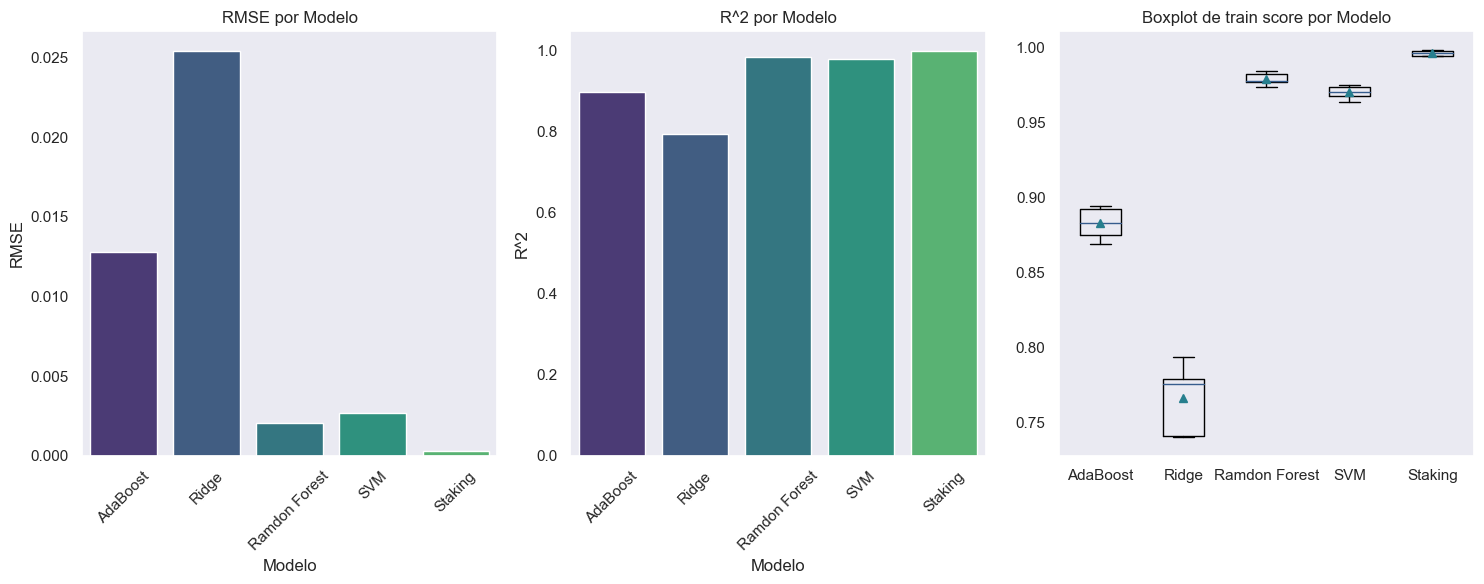

In [ ]:
sns.set(style="dark") 
sns.set_palette("viridis") 

# Crear un barplot de modelos vs RMSE
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Modelo', y='RMSE', data=df_resultados)
plt.title('RMSE por Modelo')
plt.xticks(rotation=45)

# Crear un barplot de modelos vs R^2
plt.subplot(1, 3, 2)
sns.barplot(x='Modelo', y='R^2', data=df_resultados)
plt.title('R^2 por Modelo')
plt.xticks(rotation=45)

# Crear un boxplot adicional para mostrar los score que de cada modelo con los datos de entrenamiento
plt.subplot(1, 3, 3)
plt.boxplot(train_sco, labels=nombres_modelos, showmeans=True)
plt.title('Boxplot de train score por Modelo')

plt.tight_layout()
plt.show()

